In [ ]:
# !pip install opencv-contrib-python --user

In [134]:
# !pip install joblib

In [4]:
# !pip install face_recognition

In [50]:
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [51]:
path_to_data = 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped'

In [52]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs[:5]

['C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped\\Aamir_Khan',
 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped\\Abhay_Deol',
 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped\\Abhishek_Bachchan',
 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped\\Aftab_Shivdasani',
 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/cropped\\Aishwarya_Rai']

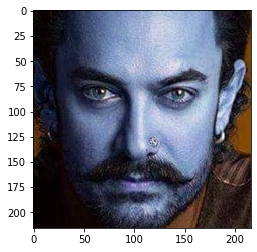

In [53]:
img = cv2.imread(img_dirs[0]+'/'+os.listdir(img_dirs[0])[0])
plt.imshow(img)

In [88]:
celebrity_name = []
new_folder = 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/All/'
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    try:
        img = cv2.imread(img_dir+'/'+os.listdir(img_dir)[0])
    except:
        img = None
    if img is not None:
        file_name = celebrity_name + '.jpg'
        file_path = new_folder + "/" + file_name

        cv2.imwrite(file_path, img)

In [89]:
file_path

'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/All//cropped\\Zareen_Khan.jpg'

In [90]:
new_folder = 'C:/Users/GAME/Bollywood Celebrity Classifier/model/dataset_modified/All/cropped'
images = []
classNames = []

In [91]:
myList = os.listdir(new_folder)
len(myList)

96

In [92]:
for cl in myList:
    curImg = cv2.imread(f'{new_folder}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
classNames[8]

'Amitabh_Bachchan'

In [95]:
# Rani Mukerjee
# Akshaye Khaanna
# ameesha Patel

In [94]:
len(classNames)

96

In [96]:
encodeList = []
try:
    for i in range(len(images)):
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
except:
    print(i)
len(encodeList)    

96

In [97]:
for i,j in zip(range(len(classNames)), classNames):
    print(i,j)

0 Aamir_Khan
1 Abhay_Deol
2 Abhishek_Bachchan
3 Aftab_Shivdasani
4 Aishwarya_Rai
5 Ajay_Devgn
6 Akshay_Kumar
7 Alia_Bhatt
8 Amitabh_Bachchan
9 Amrita_Rao
10 Amy_Jackson
11 Anil_Kapoor
12 Anushka_Sharma
13 Anushka_Shetty
14 Arjun_Kapoor
15 Arjun_Rampal
16 Arshad_Warsi
17 Asin
18 Ayushmann_Khurrana
19 Bhumi_Pednekar
20 Bipasha_Basu
21 Bobby_Deol
22 Deepika_Padukone
23 Disha_Patani
24 Emraan_Hashmi
25 Esha_Gupta
26 Farhan_Akhtar
27 Govinda
28 Hrithik_Roshan
29 Huma_Qureshi
30 Irrfan_Khan
31 Jacqueline_Fernandez
32 John_Abraham
33 Juhi_Chawla
34 Kajal_Aggarwal
35 Kajol
36 Kangana_Ranaut
37 Kareena_Kapoor
38 Karisma_Kapoor
39 Kartik_Aaryan
40 Katrina_Kaif
41 Kiara_Advani
42 Kriti_Kharbanda
43 Kriti_Sanon
44 Kunal_Khemu
45 Lara_Dutta
46 Madhuri_Dixit
47 Manoj_Bajpayee
48 Mrunal_Thakur
49 Nana_Patekar
50 Nargis_Fakhri
51 Naseeruddin_Shah
52 Nushrat_Bharucha
53 Paresh_Rawal
54 Parineeti_Chopra
55 Pooja_Hegde
56 Prabhas
57 Prachi_Desai
58 Preity_Zinta
59 Priyanka_Chopra
60 Rajkummar_Rao
61 Ranb

Akshay_Kumar


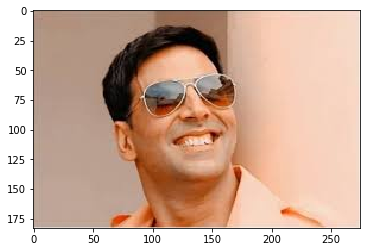

In [98]:
test_img = cv2.imread('C:/Users/GAME/Downloads/akshay.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
try:
    encode = face_recognition.face_encodings(test_img)[0]
except:
    print('Could not extract face features')
r = []
results = face_recognition.compare_faces(encodeList, encode)
faceDis = face_recognition.face_distance(encodeList, encode)
for i, j in enumerate(results):
    if j==True:
#         print(i)
        r.append(i)
try:        
    facesoption = []
    for i in r:
    #     print(i, faceDis[i])
        facesoption.append(faceDis[i])

    print(classNames[r[np.argmin(facesoption)]])
except:
    print("Unknown Face Detected")
plt.imshow(test_img)

In [125]:
import json
with open('class_names.json','w') as f:
    f.write(json.dumps(classNames))


In [137]:
type(classNames)

list

In [145]:
encodeList

[array([-8.69477466e-02,  8.84826258e-02,  9.43844393e-02, -5.57317026e-02,
        -1.18757486e-01, -7.90286995e-03,  1.69122256e-02, -6.93124831e-02,
         2.22475305e-01, -1.31685901e-02,  8.57328847e-02, -9.81859118e-03,
        -2.18202189e-01, -4.19911556e-02,  3.88912335e-02,  9.70043689e-02,
        -2.42125049e-01, -1.21172786e-01, -1.45853236e-02, -1.19054541e-01,
         5.47932871e-02,  1.04111947e-01,  3.27220671e-02,  1.93632096e-02,
        -1.71751633e-01, -3.69615316e-01, -1.07760087e-01, -9.22509730e-02,
         1.81441948e-01, -9.17527527e-02,  1.52770532e-02,  5.25625609e-02,
        -1.88821301e-01, -9.33149904e-02,  6.16924185e-03,  9.57646966e-02,
        -1.02842562e-01, -9.71677452e-02,  1.31182045e-01,  5.55060208e-02,
        -1.48885444e-01,  4.25255252e-03, -6.62805140e-03,  3.37883979e-01,
         1.91678986e-01,  1.08559124e-01,  4.54099923e-02, -6.14221394e-02,
         1.01779275e-01, -2.39423648e-01,  1.47231489e-01,  1.40309528e-01,
        -4.6

In [152]:
import pickle
pickle.dump(encodeList , open( "encodedList.pkl", "wb" ) )

In [155]:
import pickle
encodeList = pickle.load( open( "C:/Users/GAME/Bollywood Celebrity Classifier/server/artifacts/encodedList.pkl", "rb" ) )